In [3]:
import numpy as np
from scipy import fft
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 15})
#%config InlineBackend.figure_format='retina'

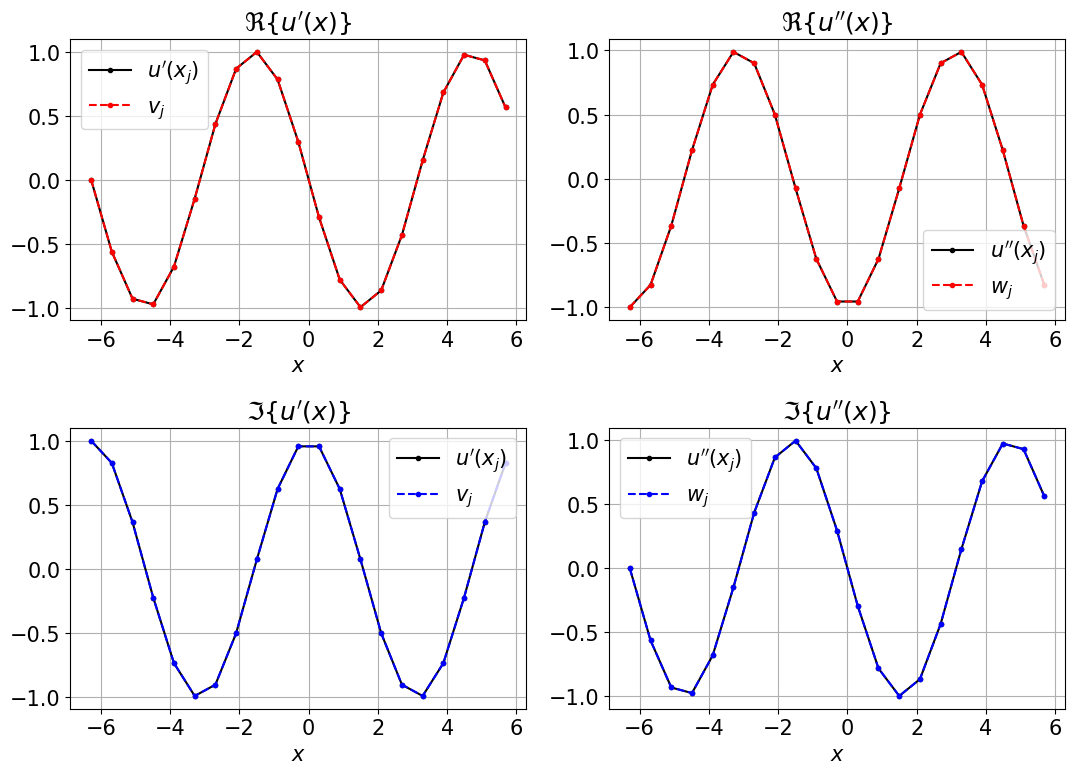

In [4]:
N = 21 # an odd integer
xlim = [-2*np.pi, 2*np.pi]
L  = xlim[1] - xlim[0]
xj = np.linspace(*xlim, N + 1)[:-1]
uj = np.exp(1j*xj)

Uj = fft.fft(uj)
kj = np.hstack([
    np.arange(0,   N/2),     # k > 0 domain
    np.arange(-int(N/2), 0), # k < 0 domain
]) * 2*np.pi/L

# 1st-order derivatives
Vj = 1j * kj * Uj
vj = fft.ifft(Vj)

# 2nd-order derivatives
Wj = -1 * kj**2 * Uj
wj = fft.ifft(Wj)

# plot
plt.figure(figsize=[11, 8])

plt.subplot(2, 2, 1)
plt.plot(xj, (1j*np.exp(1j*xj)).real, ".-k",
         xj, vj.real, ".--r")
plt.legend(["$u'(x_j)$", "$v_j$"])
plt.xlabel("$x$")
plt.title("$\\Re\\{u'(x)\\}$")
plt.grid()
#
plt.subplot(2, 2, 2)
plt.plot(xj, (-1*np.exp(1j*xj)).real, ".-k",
         xj, wj.real, ".--r")
plt.legend(["$u''(x_j)$", "$w_j$"])
plt.xlabel("$x$")
plt.title("$\\Re\\{u''(x)\\}$")
plt.grid()
#
plt.subplot(2, 2, 3)
plt.plot(xj, (1j*np.exp(1j*xj)).imag, ".-k",
         xj, vj.imag, ".--b")
plt.legend(["$u'(x_j)$", "$v_j$"])
plt.xlabel("$x$")
plt.title("$\\Im\\{u'(x)\\}$")
plt.grid()
#
plt.subplot(2, 2, 4)
plt.plot(xj, (-1*np.exp(1j*xj)).imag, ".-k",
         xj, wj.imag, ".--b")
plt.legend(["$u''(x_j)$", "$w_j$"])
plt.xlabel("$x$")
plt.title("$\\Im\\{u''(x)\\}$")
plt.grid()

plt.tight_layout()
plt.show()